In [17]:
# Don't change this cell; just run it. 
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# (40 Points) Hotel Inspections

In this exercise, we will explore a dataset that includes the safety inspection scores for hotels. We will be interested in determining the average hotel score for the city from a random sample of the scores. The average hotel score is out of 100. We'll compare two methods for computing a confidence interval: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [18]:
hotel_scores = Table.read_table('hotel_inspection.csv')
hotel_scores

Inspection Date,Score
01/27/2014,100
08/18/2016,85
12/18/2014,72
01/22/2015,95
02/19/2015,100
11/14/2013,85
11/06/2014,100
01/25/2016,89
04/05/2016,76
11/10/2015,75


## 1. (10 Points) Data Exploration

**a. (3 Points) Plot a histogram of the scores in the cell below.**

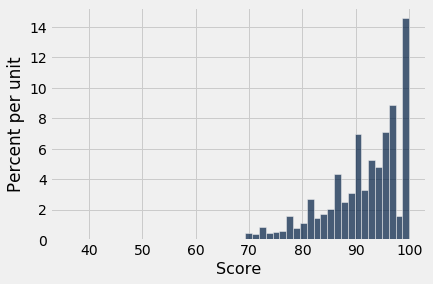

In [19]:
# Write your code here.
hotel_scores.hist("Score",bins = 50)

**b. (3 Points) Calculate the *population mean*:**

In [20]:
pop_mean = hotel_scores.column(1).mean()
pop_mean

91.42175

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 hotel inspections, called `hotel_sample`.  That table is created below. We are interested in using this sample to estimate the population mean.

In [21]:
hotel_sample = hotel_scores.sample(100, with_replacement=False)
hotel_sample

Inspection Date,Score
04/21/2015,86
05/11/2016,93
03/02/2015,83
06/18/2014,93
07/05/2016,90
01/20/2015,93
03/11/2016,99
08/25/2014,96
06/13/2016,100
04/02/2015,100


**c. (4 Points) Plot a histogram of the *sample* scores in the cell below.**

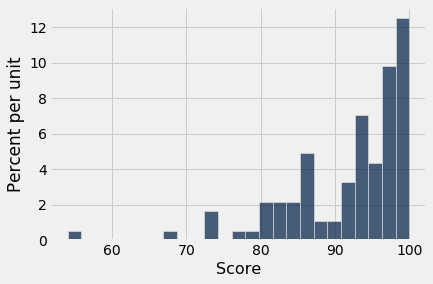

In [22]:
# Write your code "here:
hotel_sample.hist("Score",bins = 25)

Calculate the **sample mean**:

In [23]:
sample_mean = hotel_sample.column(1).mean()
sample_mean

92.0

## 2. (15 Points) Bootstraping
**a. (10 Points) Complete the function `bootstrap_scores` below. It should take no arguments. It should simulate drawing 5000  bootstrap samples (same size as the original sample) from `hotel_sample` and computing the mean hotel score in each sample.  It should return an array (resampled_means) of those 5000 bootstrap sample means.**

In [24]:
#medians = make_array()

#for i in np.arange(1000):
#    resampled = our_sample.sample()
 #   median = percentile(50, resampled.column('Total Compensation'))
  #  medians = np.append(medians, median)

def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean1 = hotel_sample.sample()
        resampled_mean = percentile(50,resampled_mean1.column("Score"))
        resampled_means = np.append(resampled_means, resampled_mean) 
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([94., 96., 96., ..., 96., 96., 97.])

Plot a histogram of the **bootstrap sample means**.

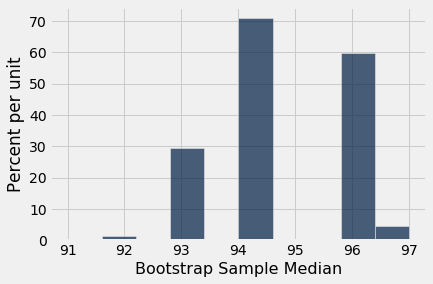

In [25]:

hotel_sample = Table().with_column(
    'Bootstrap Sample Median', resampled_means)

hotel_sample.hist()

#plots.scatter(pop_median, 0, color='red', s=40);

**b. (5 Points) Compute a 95 percent confidence interval for the average hotel score using the array `resampled_means`.**

In [26]:
lower_bound = percentile(5, hotel_sample.column("Bootstrap Sample Median"))
upper_bound = percentile(95, hotel_sample.column("Bootstrap Sample Median"))
print("95% confidence interval for the average hotel score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average hotel score, computed by bootstrapping:
( 93.0 , 96.0 )


## 3. (15 Points) Central Limit Theorum

**a. (5 Points) Does the distribution of the  bootstrap sample mean scores(from part 2.a) look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.**


*Yes.*

For the previous question, you'll need to recall two facts.
1. If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.
2. The Central Limit Theorem tells us the quantitative relationship between the following:
    * the standard deviation of an array of numbers.
    * the standard deviation of an array of means of samples taken from those numbers.

**b. (10 Points) Without using the array `resampled_means` or performing any new simulations, calculate 95 percent confidence interval for the average hotel score**

You may use the following values to compute your result, but you should not perform additional sampling - think about how you can use the Central Limit Theorem to accomplish this. You can use sample standard deviation before as an approximation for population standard deviation. 

In [27]:
sample_mean = np.mean(hotel_sample.column("Bootstrap Sample Median"))
sample_sd = np.std(hotel_sample.column("Bootstrap Sample Median"))
sample_size = hotel_sample.num_rows
normal = (sample_size-sample_mean)/sample_sd

hotel_sample = Table().with_column('Bootstrap Sample Median1', normal)

lower_bound_normal = percentile(5, hotel_sample.column("Bootstrap Sample Median1"))
upper_bound_normal = percentile(95, hotel_sample.column("Bootstrap Sample Median1"))
print("95% confidence interval for the average hotel score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average hotel score, computed by a normal approximation:
( 3929.862287824357 , 3929.862287824357 )


This confidence interval should look very similar to the one you computed in **Question 1**. This is actually an interval around the `sample_mean` that would cover approximately 95% of the numbers in the `resampled_means` array.

# (40 Points) Learning to fly a drone

You recently bought a drone and trying to practice flying it. You decided to challenge your self and mark a special landing zone in front of your house. You practice landing the drone on that mark. Since you are stuck at home, you try this landing excercise over 800 times. 

You document the landing coordinates of all your trials. You don't always land on the mark, many external factors affect your landing accuracy. 

## 1. (7 points) Exploring the data

**Your landing coordinates are documented in coords.csv. Landing mark is at (0,0)**

**a. (4 Points) Plot a scatter of the x, y coordinates of your landing positions. Add a marker at point (0, 0) for your landing mark.**

x,y
17.8207,-8.11736
4.465,2.91691
11.5573,30.368
-15.2723,-6.95247
4.18479,-36.8061
35.2748,-32.7902
-9.62583,-42.9628
-59.8439,17.283
3.65805,8.80531
-28.2791,50.522


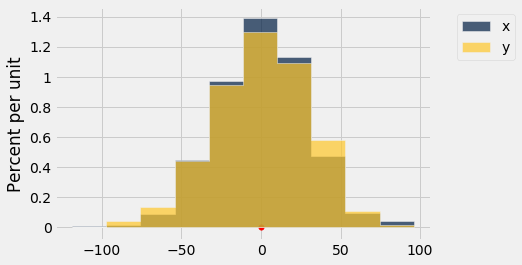

In [28]:
coords = Table.read_table("coords.csv")
# plot scatter of coords
# add a marker for the landing pad at x=0, y=0. Look at the codes from Chapter 11 or other chapters to see examples of how you can mark (0,0)
coords.hist()
plots.scatter(0, 0, color='red', s=30)
coords

One time, something strange happened and you landed very far from the landing mark, specifically at point (80.59, 30.91). You don't understand if it was a strange incident such as a malfunction of the drone. 


**b. (3 Points) Add marker to this point on your previous graph**

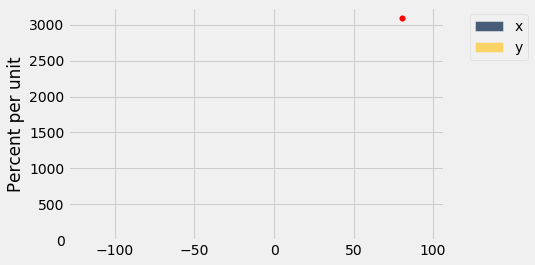

In [29]:
strange_landing = make_array(80.59, 30.91)
# recreate the previous plot and add a special marker for this strange landing
coords.hist()
plots.scatter(strange_landing[0],strange_landing[1], color='red', s=30)

## 2. (7 points) hypothesis testing: 

**Given what you learned in CS240 you'd like to test if this was indeed a strange incident. To do this you'll use hypothesis testing.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?**

**Null hypothesis:** .. *The avarage population or something else is equal to null hypothesis. To give an exmaple, the average age in the population is 30 years.* 

**Alternative hypothesis:** The avarage population or something else is not equal to the alternative hypothesis. To give an exmaple, The average age in the population is not
30 years. 

## 3. (6 points) What's a good test statistic for this hypothesis test? 

A good test statistic would be small if the null hypothesis is true, and large otherwise. If we want to compare landings, we want to see *how far* each landing is from some *reference point*, so we can compare all landings from the same point.


You choose the distance from each landing point to the landing mark (0, 0) as your test statistic. 

**Write a function that given x, y calculates the test statisitc at these coordinates.**

In [149]:
def landing_test_statistic(x_coordinate, y_coordinate):
    distance1 = x_coordinate.where("x",np.average)
    distance2 = y_coordinate.where("y",np.average)
    return distance1.column(1).item(0) - distance1.column(1).item(1),distance2.column(1).item(0) - distance2.column(1).item(0)
cord_x = coords.select("x")
cord_y = coords.select("y")
shuffled_coord = coords.sample(with_replacement=False).column(0)
shuffled_coord1 = coords.sample(with_replacement=False).column(1)
shuffled = coords.with_column('Shuffled Coords x', shuffled_coord)
shuffled1 = coords.with_column('Shuffled Coords y', shuffled_coord1)
shuffled1
diffs = make_array()
repetitions=5000
for i in np.arange(repetitions):
    shuffled_coord = coords.sample(with_replacement=False).column(0)
    shuffled_coord1 = coords.sample(with_replacement=False).column(1)
    shuffled = coords.with_column('Shuffled Coords x', shuffled_coord)
    shuffled1 = coords.with_column('Shuffled Coords y', shuffled_coord1)
    diff = landing_test_statistic(shuffled,shuffled1)
    diffs = np.append(diffs, diff)

diffs

array([-11.03427512,   0.        , -11.03427512, ...,   0.        ,
       -11.03427512,   0.        ])

## 4. (20 points) We are going to compute the p-value using your test statistic.  

**a. (4 Points) First let's calculate the test statistic for our strange landing point (the landing point from 1.b) using the function you created in the previous question.**

In [150]:
strange_test_stat = landing_test_statistic(strange_landing[0],strange_landing[1])

strange_test_stat

AttributeError: 'numpy.float64' object has no attribute 'where'

**b. (6 Points) Now we are going to find the test stat for all the landing points in our dataset. Use the function you created to calculate the test stat for all x,y values.**

In [ ]:
all_points_test_stats = make_array()
# calculate the test stats for all landing points and store them to the array all_points_test_stats
....

all_points_test_stats

**c. (6 Points) Now, to calculate the p-value for our strange landing point, we are going to count the times where our landing coordinates' test stat were larger than or equal to our strange test stat.**

**Dividing this number with the total number of landings would give us the p-value.**

In [ ]:
# you will be using all_points_test_stats and strange_test_stat to calculate the p-value
p_value = ...............
p_value

**d. (4 Points) Was your landing strange after all? Briefly discuss by comparing with the commonly used p-value significance levels**

*Write your answer here, replacing this text.*

# (20 Points) Correlations

In this exercise you will be exploring the relation between peoples' weights and heights. 

In [151]:
health = Table.read_table("weight-height.csv")
health

Height,Weight
73.847,241.894
68.7819,162.31
74.1101,212.741
71.731,220.042
69.8818,206.35
67.253,152.212
68.7851,183.928
68.3485,167.971
67.0189,175.929
63.4565,156.4


**a. (6 Points) Make a scatter plot of the data.  Put weight on the vertical axis**

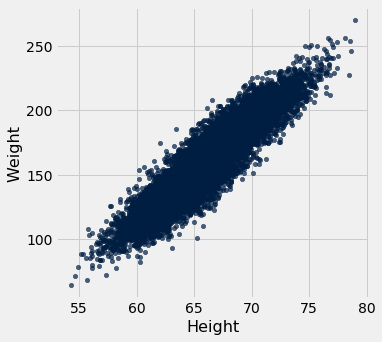

In [153]:
health.scatter("Height","Weight")

**b. (4 Points) Look at the scatter plot. Are height and weight roughly linearly related? Indicate which of the below correlations strengths are most probably and  briefly explain your answer**
- 1
- 0
- -1

*Yes they are linearly related because when we look at the scatter the we can see the r value is bigger then zero. That's why it is linearly related*

**c. (5 Points) We'd next like to see the data in standard units.  Recall that, if `nums` is an array of numbers, then..**

    (nums - np.mean(nums)) / np.std(nums)

**...is an array of those numbers in standard units.**

In [161]:
weight_mean = np.mean(health.column("Weight"))
weight_std = np.std(health.column("Weight"))
height_mean = np.mean(health.column("Height"))
height_std = np.std(health.column("Height"))
weight_val = (health.column("Weight")-weight_mean)/weight_std
height_val = (health.column("Height")-height_mean)/height_std

standard_health = Table().with_columns(
   "weight (standard units)", weight_val,
   "height (standard units)", height_val)
standard_health

weight (standard units),height (standard units)
2.5058,1.94406
0.0271006,0.627537
1.59781,2.01244
1.82522,1.39406
1.39875,0.913421
-0.287422,0.230148
0.700397,0.628362
0.203407,0.51489
0.451277,0.169309
-0.156997,-0.756645


**d. (5 Points) Calculate the correlation score between the two variables**

Hint: Calculate this by using the data in the standard units.

In [163]:
r = standard_health.column("weight (standard units)") * standard_health.column("height (standard units)")
r

array([4.87142341, 0.01700664, 3.2154947 , ..., 0.66705385, 0.05207269,
       1.71134914])

In [164]:
a = make_array(0.1, 1.47, 1.82, 2.18, 2.22, 3.84, 5.02, 6.0, 6.3, 9.62, 9.74, 10.75, 11.33, 11.58, 12.44, 13.39, 14.21, 14.23, 18.62, 19.52)
percentile(2.5, a)

0.1